# **Modul Praktikum 5 MA2151 Sikomat 2020**

# **Soal Praktikum 5 MA2151 Sikomat 2020**


## 1 (Bakteri)


<ol type="a">
    <li> Dengan populasi awal 100 bakteri dan laju pertumbuhan 10% per jam, tentukan banyaknya bakteri setelah 1 minggu
    <li> Berapa lama waktu yang dibutuhkan agar populasi berlipat 2?
</ol>

In [ ]:
# Jawaban 1a

# Untuk menyelesaikan permasalahan, akan digunakan persamaan beda hingga
# populasi[t] = populasi[t-1] + populasi[t-1] * delta * laju_tumbuh


delta = 0.0001         # delta iterasi
populasi = 100         # banyak bakteri
laju_tumbuh = 0.1      # laju pertumbuhan (% populasi / jam)
it = 0                 # counter untuk iterasi

while it < (24*7)/delta:
  populasi += laju_tumbuh * delta * populasi
  it += 1

print('besar populasi setelah satu pekan ada sekitar',
      round(populasi), 'bakteri.')

besar populasi setelah satu pekan ada sekitar 1977474152 bakteri.


Berikut beberapa hasil akhir yang didapatkan dengan menggunakan beberapa nilai `delta` yang berbeda.

```
Delta  | Banyak Bakteri 
1.0    |    899437740
0.1    |   1819315229
0.01   |   1961108638
0.001  |   1975979856
0.0001 |   1977474152
```

In [ ]:
# Jawaban 1b

# Untuk menyelesaikan bagian b, kita masih menggunakan persamaan
# beda hingga yang sama dengan soal 1a. Namun untuk bagian ini,
# akan digunakan kriteria perulangan `while` yang berjalan selama
# populasi < 2*pop_awal


delta = 0.0001            # delta iterasi
pop_awal = 100            # populasi awal bakteri
populasi = pop_awal       # populasi bakteri saat iterasi ke-it
laju_tumbuh = 0.1         # laju pertumbuhan (% populasi / jam)
it = 0                    # counter untuk iterasi

while populasi < 2*pop_awal:
  populasi += laju_tumbuh * delta * populasi
  it += 1

print('waktu untuk populasi berlipat ganda adalah', it*delta, 'jam')

waktu untuk populasi berlipat ganda adalah 6.9316 jam


Berikut beberapa hasil akhir yang didapatkan dengan menggunakan beberapa nilai `delta` yang berbeda

```
Delta  | Hasil (jam)
1      |  8
0.1    |  7.0
0.01   |  6.94
0.001  |  6.932
0.0001 |  6.9316
```

## 2 (Hukum Newton untuk Pemanasan dan Pendinginan)

Hukum Newton mengenai pemanasan dan pendinginan </i> menyatakan bahwa laju perubahan suatu obyek ($T$) terhadap waktu ($t$) sebanding dengan beda antara suhu obyek tersebut dengan suhu lingkungan sekitarnya. Misalkan air dingin dengan suhu $6^{\circ} C$ diletakkan dalam ruangan bersuhu $25^{\circ} C$. Setelah 1 jam, suhu air tersebut adalah $20^{\circ} C$.

<ol type="a">
    <li> Berapakah suhu air setelah 15 menit?
    <li> Berapa lama waktu yang dibutuhkan sehingga air akan bersuhu sama dengan ruangan?
</ol>

Dalam bentuk persamaan, rumus Newton memiliki bentuk persamaan beda
$$ \frac{\Delta T}{\Delta t} = -k (T-T_c)$$

Dengan $T$ sebagai suhu air saat $t$ satuan waktu, $T_c$ adalah suhu ruangan, dan $k$ sebagai konstanta laju perubahan suhu benda. Untuk melakukan simulasi pada soal, konstanta $k$ dapat ditemukan dengan dua cara yang berbeda.

Cara pertama adalah dengan mengubah bentuk persamaan beda diatas menjadi $$k = - \frac{1}{\Delta t} \frac{\Delta T}{T-T_c}$$ dan melakukan subtitusi dengan hasil observasi yang ada di soal. Sayangnya nilai $k$ dari metode ini sering tidak cukup akurat, jika jarak antar observasi terlalu jauh (dalam soal ini, berjarak satu jam)


Cara kedua untuk mendapatkan nilai $k$ adalah dengan menyelesaikan bentuk persamaan diferensial $$\frac{dT}{dt} = -k (T-T_c)$$ yang menghasilkan persamaan $$ k = -\frac{1}{t} \log\Big(\frac{T-T_c}{T_0-T_c}\Big)$$ Nilai $k$ yang didapat dari metode ini benar secara analitik. Lebih lanjut, kita juga dapat menentukan suhu benda untuk sebarang $t$ tanpa perlu melakukan simulasi. Karena kita juga mendapatkan solusi analitik

$$T(t) = 25 - 19e^{-kt}$$

Sayangnya metode ini sering tidak digunakan karena pada kenyataannya, banyak persamaan diferensial yang sulit dicari solusinya. Dengan bahasa lain, jauh lebih cepat menulis kode persamaan beda [dan menemukan hampiran numeriknya] ketimbang mencari solusi persamaan diferensial [dan menemukan solusi analitiknya].

Untuk soal ini, kita akan menggunakan dua jenis $k$ di atas, dan membandingkan hasilnya. Perlu diingat bahwa kedua metode akan menghasilkan $T \to 25$ saat $t \to \infty$ :D

In [ ]:
from math import log

# Konstant k dihitung dalam satuan waktu menit
k_persbeda = -(20-6) / (20-25) / 60       # (T-T0) /(T-Tc) / (t-t0)
k_persdiff = -log((20-25)/(6-25)) / 60    # -log((T-Tc)/(T0-Tc)) / t


print('k dari persamaan beda         :', round(k_persbeda, 4))
print('k dari persamaan differensial :', round(k_persdiff, 4))
print('rasio k_persbeda / k_persdiff :', round(k_persbeda/k_persdiff, 4))

k dari persamaan beda         : 0.0467
k dari persamaan differensial : 0.0223
rasio k_persbeda / k_persdiff : 2.0974


Terlihat ada perbedaan [rasio] signifikan antara nilai konstanta $k$ dari persamaan beda dan dari persamaan differensial.

### Nilai $k$ dari persamaan beda

In [ ]:
# Jawaban 2a&b

# Berikut adalah implementasi persamaan beda Newton untuk mengerjakan soal
# nomor 2, dengan menggunakan k dari persamaan beda.
#
# Karena suhu air tidak akan pernah sama dengan suhu ruangan (hanya konvergen
# ke suhu ruangan), akan digunakan kriteria penghentian perulangan
# abs(T-Tc) < epsilon = 1e-8. Dengan kata lain, berhenti melakukan simulasi
# bila selisih antara suhu air dan suhu ruangan sudah kurang dari 10**-8.
#
# Karena kriteria diatas mungkin memerlukan waktu yang lama untuk dicapai,
# juga akan digunakan kriteria penghentian perulangan it > 1e5/delta
# Dengan kata lain, berhenti melakukan simulasi bila banyak iterasi sudah
# lebih dari 10**5/delta (karena banyak iterasi sebanding dengan 1/delta)


delta = 0.001   # delta iterasi
k = k_persbeda  # akan digunakan k dari persamaan beda
T = 6           # suhu air
Tc = 25         # suhu ruangan
it = 0          # counter untuk iterasi

# selama selisih suhu signifikan dan
# iterasi yang dilakukan belum terlalu lama
while abs(T-Tc)>=1e-8 and (it<=1e5/delta):
  T  += -k * (T-Tc) * delta
  it += 1

print('Suhu air di akhir simulasi :', T, 'C')
print('Perbedaan suhu tidak signifkan sejak', it*delta, 'menit')

Suhu air di akhir simulasi : 24.99999999000031 C
Perbedaan suhu tidak signifkan sejak 457.814 menit


### Nilai $k$ dari persamaan differensial

In [ ]:
# Jawaban 2a&b

# Berikut adalah implementasi persamaan beda Newton untuk mengerjakan soal
# nomor 2, dengan menggunakan k dari persamaan differensial.
#
# [deskripsi yang sama dengan kode sebelumnya]


delta = 0.001   # delta iterasi
k = k_persdiff  # akan digunakan k dari persamaan differensial
T = 6           # suhu air
Tc = 25         # suhu ruangan
it = 0          # counter untuk iterasi

# selama selisih suhu signifikan dan
# iterasi yang dilakukan belum terlalu lama
while abs(T-Tc)>=1e-8 and (it<=1e5/delta):
  T  += -k * (T-Tc) * delta
  it += 1

print('Suhu air di akhir simulasi :', T, 'C')
print('Perbedaan suhu tidak signifkan sejak', it*delta, 'menit')

Suhu air di akhir simulasi : 24.999999990000042 C
Perbedaan suhu tidak signifkan sejak 960.219 menit


## 3 (Aspirin)

Aspirin adalah obat yang sering digunakan untuk mengatasi sakit kepala. Waktu paruh aspirin adalah sekitar 3,2 jam. Untuk menjadi efektif, konsentrasi minimum yang dibutuhkan adalah 150 $\mu$g/mL. Sedangkan aspirin menjadi toksik ketika mencapai konsentrasi 350 $\mu$g/mL. 

Karena terlalu sering begadang dalam rangka menyambut musim ujian, seorang praktikan Sikomat (sebut saja A) mengalami sakit kepala. Ia diresepi aspirin, lalu mengosumsinya 2 tablet di jam 7 pagi. Kemudian mengonsumsi lagi 2 tablet sebanyak 3 kali dalam selang waktu tiap 4 jam. Massa aspirin tiap tabletnya adalah 350 mg.

Asumsikan volume usus 5000 mL, volume plasma 3000 mL, aspirin dapat langsung terserap ke usus kemudian diserap ke plasma dengan fraksi absorbsi ke plasma 0,2. Asumsikan pula pada awalnya tidak ada aspirin di usus sang praktikan. Gunakan $\Delta=0.01$.

*   Dengan menghitung dosis aspirin di tubuhnya dalam jangka 24 jam, tentukan keamanan dosis obat yang diminum praktikan A. Perkirakan pula rentang waktu keefektifan obat tersebut.

*   Praktikan B, yang juga mengalami sakit kepala serupa, juga mendapat resep yang sama dengan A. Namun, karena ia tak sabaran, ia mengonsumsi aspirin 3 tablet sebanyak 4 kali, dengan selang waktu 4 jam. Apakah hal ini berbahaya? Bandingkan efek aspirin di praktikan B terhadap praktikan A.


Untuk memodelkan konsentrasi aspirin $C$, kita akan mengamati keadaan yang terjadi di dua tempat, yakni usus dan plasma [darah]. Agar memudahkan penulisan, kata 'konsentrasi' akan merujuk pada 'konsentrasi aspirin'. Lebih lanjut, ada beberapa kemungkinan asumsi yang dapat kalian gunakan untuk simulasi soal ini. Berikut dua asumsi yang mirip, namun dengan hasil yang jauh berbeda

### Asumsi #1




#### Usus
* Konsentrasi di usus sebanding dengan banyak aspirin yang dikonsumsi.
* Laju penyerapan aspirin dari usus ke plasma sebanding dengan konsentrasi di usus.

$$\frac{\Delta C_\text{usus}}{\Delta t} = -k_1C_\text{usus}$$

nilai $k_1$ pada persamaan tersebut yang dimaksud dengan "fraksi absorbsi" obat.

#### Plasma
* Laju penambahan aspirin dari usus ke plasma sebanding dengan konsentrasi di usus.
* Laju penyerapan aspirin dari plasma ke tubuh, sebanding dengan konsentrasi di darah.

$$\frac{\Delta C_\text{plasma}}{\Delta t} = k_1\frac{V_\text{usus} C_\text{usus}}{V_\text{plasma}} - k_2C_\text{plasma}$$

nilai $k_2$ pada persamaan tersebut menandakan laju penyerapan aspirin oleh tubuh. Nilainya dapat ditentukan dengan menggunakan informasi tentang waktu paruh obat -- waktu yang dibutuhkan bagi konsentrasi obat di plasma berkurang menjadi separuhnya. Anggap jika tidak ada 'transfer' aspirin dari usus ke plasma, kita akan mendapatkan persamaan beda

$$\frac{\Delta C_\text{plasma}}{\Delta t} = - k_2C_\text{plasma}$$

Mengubah bentuk di atas menjadi persamaan diferensial dan menyelesaikannya, didapatkan

$$k_2 = - \frac{\log C_2 - \log C_1}{t_2 - t_1} = -\frac{\log 0.5}{t_\text{paruh}}$$


In [ ]:
# Jawaban 3a

# Akan dibuat model simulasi dua kompartemen (`usus` dan `plasma`) untuk
# meyimulasikan konsentrasi aspirin pada tubuh praktikan. Asumsi yang
# digunakan untuk masing masing kompartemen adalah
#   * Konsentrasi di usus sebanding dengan banyak aspirin yang dikonsumsi.
#   * Laju penyerapan aspirin dari usus ke plasma sebanding dengan konsentrasi di usus.
#   * Laju penyerapan aspirin dari plasma ke tubuh, sebanding dengan konsentrasi di darah.

# ============== Pendefinisian Variabel ===================

vol_usus   = 5000    # mL
vol_plasma = 3000    # mL
k_1 = 0.2            # fraksi absorbsi usus-plasma
k_2 = -log(0.5)/3.2  # laju penyerapan obat ke tubuh

delta  = 0.01   # delta untuk iterasi
tablet = 350    # mg, massa satu tablet aspirin
C_min  = 0.15   # mg/mL, konsentrasi efektif minimum
C_max  = 0.35   # mg/mL, konsentrasi efektif maksimum

# iterasi akan dimulai sejak 7AM. karena tidak ada aspirin
# di usus praktikan sebelumnya, diasumsikan pada 7AM konsentrasi
# aspirin di usus berasal dari dua tablet yang ia konsumsi, dan
# tidak ada konsentrasi aspirin di plasma.
C_usus   = [2*tablet/vol_usus]
C_plasma = [0]

# penanda iterasi ke-it, dimulai dari iterasi ke-1
# karena hasil iterasi ke-0 sudah disimpan di C_usus dan C_plasma
it = 1  

# penanda pada iterasi ke berapa praktikan kembali mengonsumsi obat
# jam ke-4 sejak awal simulasi = iterasi ke (4/delta)
tambah_lagi = {round(jam/delta) for jam in [4, 8, 12]}
# banyak tablet yang dikonsumsi setiap pemakaian(?)
dosis = 2


# ====================== Simulasi =========================

while it < 24/delta:    # banyak iterasi: 24 jam

  # besar penyerapan aspirin dari usus ke plasma
  serap_up = k_1*C_usus[-1] * delta
  # besar penyerapan dari plasma ke tubuh
  serap_pt = k_2*C_plasma[-1] * delta

  # simpan hasil iterasi
  C_usus.append(C_usus[-1] - serap_up)
  C_plasma.append(C_plasma[-1] + serap_up*vol_usus/vol_plasma - serap_pt)

  if it in tambah_lagi:
    # waktunya mengonsumsi obat lagi.
    C_usus[-1] += dosis*tablet /vol_usus

  it += 1

# ========== Menjawab Pertanyaan di Soal =================

# menghitung berapa banyak iterasi yang menghasilkan nilai 
# kosentrasi di C_plasma melebihi batas efektif maksimum
toxic = sum(konsentrasi > C_max for konsentrasi in C_plasma)

# menghitung berapa banyak iterasi yang menghasilkan nilai 
# kosentrasi di C_plasma yang efektif bagi tubuh
effective = sum(C_min <= konsentrasi <= C_max for konsentrasi in C_plasma)

print('dosis yang diminum praktikan', 'aman' if toxic==0 else 'berbahaya')
print('lama keefektifan obat adalah', round(effective*delta, 3), 'jam')

dosis yang diminum praktikan aman
lama keefektifan obat adalah 13.66 jam


Sebagai visualisasi untuk anda, berikut adalah plot hasil simulasi tersebut

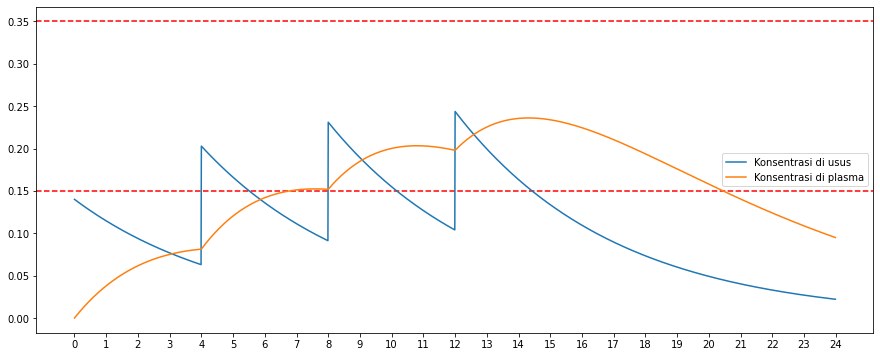

In [ ]:
#@title Plot konsentrasi aspirin di tubuh praktikan A
import matplotlib.pyplot as plt


jam = [it*delta for it in range(round(24/delta))]

plt.figure(figsize=(15, 6))
plt.xticks(range(0, 25))
plt.axhline(y=C_min, color='r', ls='--')
plt.axhline(y=C_max, color='r', ls='--')
plt.plot(jam, C_usus,   label='Konsentrasi di usus')
plt.plot(jam, C_plasma, label='Konsentrasi di plasma')
plt.legend();

In [ ]:
# Jawaban 3b

# Masih menggunakan kode dan metode yang sama dengan bagian 3a.
# Hanya, kali ini akan diubah nilai beberapa variabelnya

# konsentrasi aspirin di-set kembali
C_usus   = [2*tablet/vol_usus]
C_plasma = [0]

# penanda iterasi di-set kembali
it = 1  

# praktikan mengosumsi 3 tablet sebanyak 4x, dengan selang 4 jam  
dosis = 3
tambah_lagi = {round(jam/delta) for jam in [4, 8, 12, 16]}


# ====================== Simulasi =========================

while it < 24/delta:    # banyak iterasi: 24 jam

  # besar penyerapan aspirin dari usus ke plasma
  serap_up = k_1*C_usus[-1] * delta
  # besar penyerapan dari plasma ke tubuh
  serap_pt = k_2*C_plasma[-1] * delta

  # simpan hasil iterasi
  C_usus.append(C_usus[-1] - serap_up)
  C_plasma.append(C_plasma[-1] + serap_up*vol_usus/vol_plasma - serap_pt)

  if it in tambah_lagi:
    # waktunya mengonsumsi obat lagi.
    C_usus[-1] += dosis*tablet /vol_usus

  it += 1

# ========== Menjawab Pertanyaan di Soal =================

# menghitung berapa banyak iterasi yang menghasilkan nilai 
# kosentrasi di C_plasma melebihi batas efektif maksimum
toxic = sum(konsentrasi > C_max for konsentrasi in C_plasma)

# menghitung berapa banyak iterasi yang menghasilkan nilai 
# kosentrasi di C_plasma yang efektif bagi tubuh
effective = sum(C_min <= konsentrasi <= C_max for konsentrasi in C_plasma)

print('dosis yang diminum praktikan', 'aman' if toxic==0 else 'berbahaya')
print('lama keefektifan obat adalah', round(effective*delta, 3), 'jam')

dosis yang diminum praktikan berbahaya
lama keefektifan obat adalah 15.28 jam


Sebagai visualisasi untuk anda, berikut adalah plot hasil simulasi tersebut

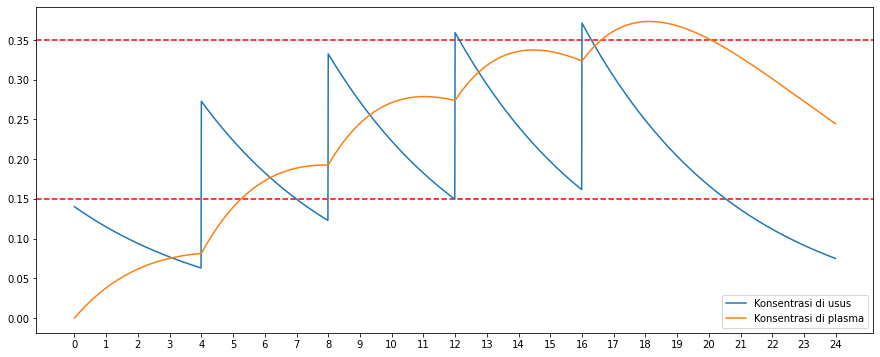

In [ ]:
#@title Plot konsentrasi aspirin di tubuh praktikan B
import matplotlib.pyplot as plt


jam = [it*delta for it in range(round(24/delta))]

plt.figure(figsize=(15, 6))
plt.xticks(range(0, 25))
plt.axhline(y=C_min, color='r', ls='--')
plt.axhline(y=C_max, color='r', ls='--')
plt.plot(jam, C_usus,   label='Konsentrasi di usus')
plt.plot(jam, C_plasma, label='Konsentrasi di plasma')
plt.legend();

### Asumsi #2

Hampir sama dengan Asumsi #1, namun kita mengubah asumsi kita mengenai seberapa cepat aspirin diserap darah dari usus: laju penyerapan aspirin dari usus ke plasma sebanding dengan selisih konsentrasi di usus dan konsentrasi di plasma.

$$\frac{\Delta C_\text{usus}}{\Delta t} = -k_1(C_\text{usus}-C_\text{plasma})$$

In [ ]:
# Jawaban 3a

# Akan dibuat model simulasi dua kompartemen (`usus` dan `plasma`) untuk
# meyimulasikan konsentrasi aspirin pada tubuh praktikan. Asumsi yang
# digunakan untuk masing masing kompartemen adalah
#   * Konsentrasi di usus sebanding dengan banyak aspirin yang dikonsumsi.
#   * Laju penyerapan aspirin dari usus ke plasma sebanding dengan selisih konsentrasi kedua kompartemen.
#   * Laju penyerapan aspirin dari plasma ke tubuh, sebanding dengan konsentrasi di darah.

# ============== Pendefinisian Variabel ===================

vol_usus   = 5000    # mL
vol_plasma = 3000    # mL
k_1 = 0.2            # fraksi absorbsi usus-plasma
k_2 = -log(0.5)/3.2  # laju penyerapan obat ke tubuh

delta  = 0.01   # delta untuk iterasi
tablet = 350    # mg, massa satu tablet aspirin
C_min  = 0.15   # mg/mL, konsentrasi efektif minimum
C_max  = 0.35   # mg/mL, konsentrasi efektif maksimum

# iterasi akan dimulai sejak 7AM. karena tidak ada aspirin
# di usus praktikan sebelumnya, diasumsikan pada 7AM konsentrasi
# aspirin di usus berasal dari dua tablet yang ia konsumsi, dan
# tidak ada konsentrasi aspirin di plasma.
C_usus   = [2*tablet/vol_usus]
C_plasma = [0]

# penanda iterasi ke-it, dimulai dari iterasi ke-1
# karena hasil iterasi ke-0 sudah disimpan di C_usus dan C_plasma
it = 1  

# penanda pada iterasi ke berapa praktikan kembali mengonsumsi obat
# jam ke-4 sejak awal simulasi = iterasi ke (4/delta)
tambah_lagi = {round(jam/delta) for jam in [4, 8, 12]}


# ====================== Simulasi =========================

while it < 24/delta:    # banyak iterasi: 24 jam

  # besar penyerapan aspirin dari usus ke plasma
  serap_up = k_1*(C_usus[-1]-C_plasma[-1]) * delta
  # besar penyerapan dari plasma ke tubuh
  serap_pt = k_2*C_plasma[-1] * delta

  # simpan hasil iterasi
  C_usus.append(C_usus[-1] - serap_up)
  C_plasma.append(C_plasma[-1] + serap_up*vol_usus/vol_plasma - serap_pt)

  if it in tambah_lagi:
    # waktunya mengonsumsi obat lagi.
    C_usus[-1] += 2*tablet/vol_usus

  it += 1


# ========== Menjawab Pertanyaan di Soal =================

# menghitung berapa banyak iterasi yang menghasilkan nilai 
# kosentrasi di C_plasma melebihi batas efektif maksimum
toxic = sum(konsentrasi > C_max for konsentrasi in C_plasma)

# menghitung berapa banyak iterasi yang menghasilkan nilai 
# kosentrasi di C_plasma yang efektif bagi tubuh
effective = sum(C_min <= konsentrasi <= C_max for konsentrasi in C_plasma)

print('dosis yang diminum praktikan', 'aman' if toxic==0 else 'berbahaya')
print('lama keefektifan obat adalah', round(effective*delta, 3), 'jam')

dosis yang diminum praktikan aman
lama keefektifan obat adalah 4.86 jam


Sebagai visualisasi untuk anda, berikut adalah plot hasil simulasi tersebut

In [1]:
#@title
import matplotlib.pyplot as plt


jam = [it*delta for it in range(round(24/delta))]

plt.figure(figsize=(15, 6))
plt.xticks(range(0, 25))
plt.axhline(y=C_min, color='r', ls='--')
plt.axhline(y=C_max, color='r', ls='--')
plt.plot(jam, C_usus,   label='Konsentrasi di usus')
plt.plot(jam, C_plasma, label='Konsentrasi di plasma')
plt.legend();

NameError: ignored

In [ ]:
# Jawaban 3b

# Masih menggunakan kode dan metode yang sama dengan bagian 3a.
# Hanya, kali ini akan diubah nilai beberapa variabelnya

# konsentrasi aspirin di-set kembali
C_usus   = [2*tablet/vol_usus]
C_plasma = [0]

# penanda iterasi di-set kembali
it = 1  

# praktikan mengosumsi 3 tablet sebanyak 4x, dengan selang 4 jam  
dosis = 3
tambah_lagi = {round(jam/delta) for jam in [4, 8, 12, 16]}


# ====================== Simulasi =========================

while it < 24/delta:    # banyak iterasi: 24 jam

  # besar penyerapan aspirin dari usus ke plasma
  serap_up = k_1*(C_usus[-1]-C_plasma[-1]) * delta
  # besar penyerapan dari plasma ke tubuh
  serap_pt = k_2*C_plasma[-1] * delta

  # simpan hasil iterasi
  C_usus.append(C_usus[-1] - serap_up)
  C_plasma.append(C_plasma[-1] + serap_up*vol_usus/vol_plasma - serap_pt)

  if it in tambah_lagi:
    # waktunya mengonsumsi obat lagi.
    C_usus[-1] += dosis*tablet /vol_usus

  it += 1

# ========== Menjawab Pertanyaan di Soal =================

# menghitung berapa banyak iterasi yang menghasilkan nilai 
# kosentrasi di C_plasma melebihi batas efektif maksimum
toxic = sum(konsentrasi > C_max for konsentrasi in C_plasma)

# menghitung berapa banyak iterasi yang menghasilkan nilai 
# kosentrasi di C_plasma yang efektif bagi tubuh
effective = sum(C_min <= konsentrasi <= C_max for konsentrasi in C_plasma)

print('dosis yang diminum praktikan', 'aman' if toxic==0 else 'berbahaya')
print('lama keefektifan obat adalah', round(effective*delta, 3), 'jam')

dosis yang diminum praktikan aman
lama keefektifan obat adalah 15.54 jam


Sebagai visualisasi untuk anda, berikut adalah plot hasil simulasi tersebut

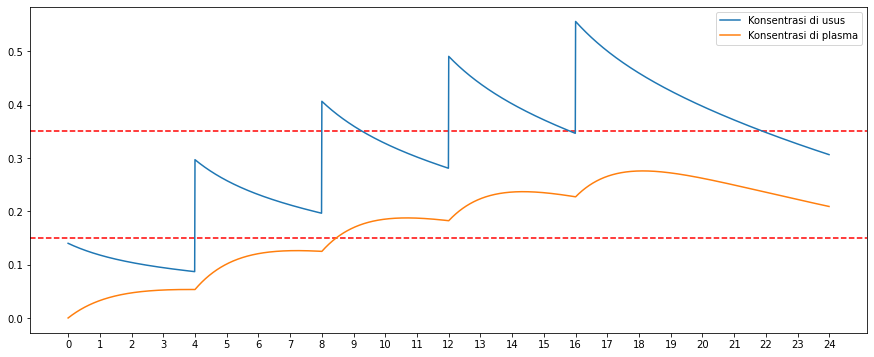

In [ ]:
#@title Plot konsentrasi aspirin di tubuh praktikan B
import matplotlib.pyplot as plt


jam = [it*delta for it in range(round(24/delta))]

plt.figure(figsize=(15, 6))
plt.xticks(range(0, 25))
plt.axhline(y=C_min, color='r', ls='--')
plt.axhline(y=C_max, color='r', ls='--')
plt.plot(jam, C_usus,   label='Konsentrasi di usus')
plt.plot(jam, C_plasma, label='Konsentrasi di plasma')
plt.legend();